In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('/Users/Jeff/Downloads/BreadBasket_DMS.csv')

In [5]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


# Data Preparation

In [8]:
df['Datetime']=pd.to_datetime(df.Date+" "+df.Time)

In [9]:
df.Datetime

0       2016-10-30 09:58:11
1       2016-10-30 10:05:34
2       2016-10-30 10:05:34
3       2016-10-30 10:07:57
4       2016-10-30 10:07:57
                ...        
21288   2017-04-09 14:32:58
21289   2017-04-09 14:32:58
21290   2017-04-09 14:57:06
21291   2017-04-09 14:57:06
21292   2017-04-09 15:04:24
Name: Datetime, Length: 21293, dtype: datetime64[ns]

In [10]:
df.Transaction.unique()

array([   1,    2,    3, ..., 9682, 9683, 9684])

In [11]:
df.Transaction.value_counts()

6474    12
6716    11
6279    11
6412    11
8835    10
        ..
8257     1
8991     1
2100     1
4905     1
2047     1
Name: Transaction, Length: 9531, dtype: int64

In [12]:
df.Item.value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Olum & polenta       1
Adjustment           1
Gift voucher         1
Polenta              1
Bacon                1
Name: Item, Length: 95, dtype: int64

In [13]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [14]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [15]:
df['beverage']=np.where(df.Item.isin(beverage),1,0)
df['other']=np.where(df.Item.isin(other),1,0)
df['kids']=np.where(df.Item.isin(kids),1,0)
df['snacks']=np.where(df.Item.isin(snacks),1,0)
df['bread']=np.where(df.Item.isin(bread),1,0)
df['breakfast_pastry']=np.where(df.Item.isin(breakfast_pastry),1,0)
df['breakfast']=np.where(df.Item.isin(breakfast),1,0)
df['dessert']=np.where(df.Item.isin(dessert),1,0)
df['condiments']=np.where(df.Item.isin(condiments),1,0)
df['lunch']=np.where(df.Item.isin(lunch),1,0)
df['other_food']=np.where(df.Item.isin(other_food),1,0)

In [16]:
df.head()

,Date,Time,Transaction,Item,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0


In [23]:
df_group=df.groupby(['Transaction','Datetime']).agg('sum').reset_index('Datetime')

In [24]:
df_group.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
Transaction,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0


In [26]:
df_group['day']=df_group.Datetime.dt.day_name()

In [28]:
df_group.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,day
Transaction,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,Sunday
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,Sunday
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0,Sunday
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,Sunday
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0,Sunday


In [30]:
df_group['hour']=df_group.Datetime.dt.hour

In [31]:
df_group.hour.value_counts()

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
18      52
19      34
7       16
20      15
22       7
23       3
21       2
1        1
Name: hour, dtype: int64

In [32]:
df_group.day.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day, dtype: int64

In [33]:
df_m1=df_group.drop('Datetime', axis=1).copy()

In [34]:
df_m1=pd.get_dummies(data=df_m1, columns=['day'], drop_first=True)

In [35]:
df_m1

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,1,0,0,0,0,0,0,14,0,0,1,0,0,0
9681,1,1,0,0,0,0,0,1,0,0,1,14,0,0,1,0,0,0
9682,2,0,0,0,0,1,0,0,0,0,1,14,0,0,1,0,0,0


# PCA

In [38]:
pca=PCA(0.85)
pca.fit(df_m1)
pca.explained_variance_ratio_

array([0.68025369, 0.08917632, 0.03451081, 0.03413873, 0.02743384])

In [39]:
pca.transform(df_m1)

array([[ 3.19812155, -0.92770995,  0.24353336,  0.00612522, -0.18022614],
       [ 2.22859445, -1.27537771,  1.18163783, -0.16153438, -0.07821643],
       [ 2.10834878,  0.42391046, -0.21894603,  0.88110866, -0.15549658],
       ...,
       [-1.83522592,  1.15844401, -0.2109789 , -0.56794032,  0.67983669],
       [-1.81166458,  0.21264392, -0.44498478, -0.38676352,  0.77826945],
       [-2.83690164,  0.11146493, -0.32283673, -0.31752853, -0.10748043]])

In [42]:
df_pca=pd.DataFrame(pca.transform(df_m1), columns=['PC'+str(i) for i in range (1,6)])

In [43]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,3.198122,-0.927710,0.243533,0.006125,-0.180226
1,2.228594,-1.275378,1.181638,-0.161534,-0.078216
2,2.108349,0.423910,-0.218946,0.881109,-0.155497
3,2.199661,-0.581693,-0.785464,-0.027864,0.691540
4,2.207516,0.036358,0.441028,-0.333733,0.733569


# Clusters

Note: I will select 5 clusters because I know that it is a good number of clusters. In general, we need to perform an analysis of clusters to decide wether or not the certain number of clusters is optimal.

In [45]:
kmeans=KMeans(5)
kmeans.fit(df_pca)

KMeans(n_clusters=5)

In [46]:
kmeans.cluster_centers_

array([[ 1.14895518,  1.37775119,  0.26403511, -0.09665207,  0.07753713],
       [-1.34127556, -0.00543609, -0.03765588, -0.0048701 , -0.06500433],
       [ 0.6767775 , -0.35277682, -0.06224669,  0.02713476, -0.0486469 ],
       [-3.6046354 , -0.01917799,  0.03552745,  0.00534854,  0.06277266],
       [ 2.92600208, -0.18024931, -0.0336987 ,  0.01248951,  0.03063015]])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

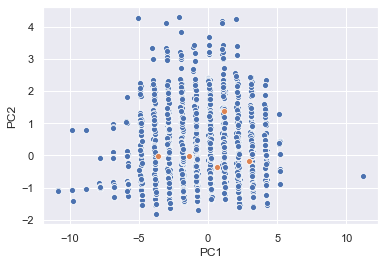

In [49]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2')
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1])

<AxesSubplot:>

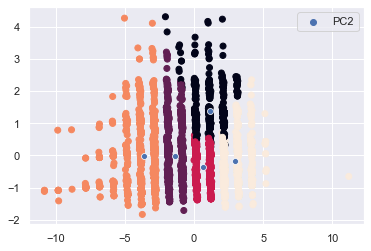

In [51]:
plt.scatter(data=df_pca, x='PC1', y='PC2', c=df_m1.cluster)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1])

In [47]:
df_m1['cluster']=kmeans.predict(df_pca)

In [53]:
df_m1.cluster.value_counts(normalize=True).round(2)

4    0.25
1    0.24
2    0.23
3    0.19
0    0.10
Name: cluster, dtype: float64

In [55]:
df_m1.reset_index(inplace=True)

In [56]:
df_beautiful=df.drop(df.columns[4:], axis=1)

In [57]:
df_beautiful

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [59]:
df_m1[['Transaction','cluster']].head()

,Transaction,cluster
0,1,4
1,2,4
2,3,4
3,4,4
4,5,4


In [61]:
df_merge=pd.merge(df_beautiful, df_m1[['Transaction','cluster']], on='Transaction', how='outer')

In [63]:
df_merge.cluster.value_counts(normalize=True).round(2)

1    0.25
4    0.21
3    0.19
2    0.18
0    0.16
Name: cluster, dtype: float64

<AxesSubplot:xlabel='cluster', ylabel='hour'>

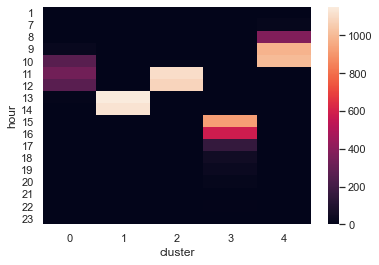

In [67]:
sns.heatmap(pd.crosstab(df_m1.hour, df_m1.cluster))

<AxesSubplot:xlabel='cluster', ylabel='hour'>

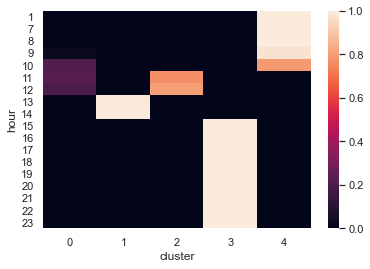

In [68]:
sns.heatmap(pd.crosstab(df_m1.hour, df_m1.cluster, normalize='index'))

<AxesSubplot:xlabel='cluster', ylabel='day'>

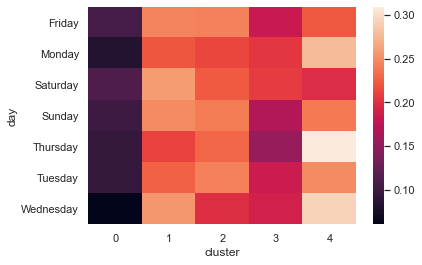

In [69]:
sns.heatmap(pd.crosstab(df_group.day, df_m1.cluster, normalize='index'))

In [72]:
a=df_merge.groupby('cluster').Item.value_counts()
a

cluster  Item                         
0        Coffee                           1344
         Tea                               287
         Hot chocolate                     173
         Bread                             167
         Pastry                            151
                                          ... 
4        Panatone                            1
         Raspberry shortbread sandwich       1
         Soup                                1
         Valentine's card                    1
         Victorian Sponge                    1
Name: Item, Length: 358, dtype: int64

In [75]:
b=a.to_frame('counts').reset_index()
b

,cluster,Item,counts
0,0,Coffee,1344
1,0,Tea,287
2,0,Hot chocolate,173
3,0,Bread,167
4,0,Pastry,151
...,...,...,...
353,4,Panatone,1
354,4,Raspberry shortbread sandwich,1
355,4,Soup,1
356,4,Valentine's card,1


In [76]:
b.set_index('Item', inplace=True)

In [77]:
b.groupby('cluster').counts.nlargest(5)

cluster  Item         
0        Coffee           1344
         Tea               287
         Hot chocolate     173
         Bread             167
         Pastry            151
1        Coffee           1219
         Bread             680
         Tea               407
         Sandwich          391
         Cake              303
2        Bread             893
         Coffee            820
         NONE              185
         Cake              163
         Pastry            163
3        Coffee            927
         Bread             560
         Tea               382
         Cake              328
         Hot chocolate     183
4        Coffee           1161
         Bread            1025
         Pastry            388
         Medialuna         260
         Tea               198
Name: counts, dtype: int64